## Quantum Fourier Transform  

## Classical discrete Fourier transform (DFT)   
Given a vector $(x_0,\ldots,x_{N-1})\in\mathbb{C}^N$, the discrete Fourier transform computes the vector $(y_0,\ldots,y_{N-1})$ for which
$$ y_j = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} x_k e^{\frac{2\pi i}{N}jk}.$$

## Quantum Fourier Transformation (QFT)  
In close analogy to the classical Fourier transform, the QFT takes an arbitrary input state $\left|\mathrm{input}\right> = \sum x_{j}\left|j\right>$ (with the orthonormal basis states $\left|0\right>$, $\left|1\right>$, ..., $\left|N-1\right>$), and maps it to the output state
$$\left|\mathrm{output}\right> = \sum_{k} y_{k}\left|k\right>,$$ 
with coefficients
$$y_{k}=\frac{1}{\sqrt{N}}\sum_{n}x_{n}e^{2\pi i\cdot n\cdot k/N}.$$

## Quantum binary representation  
We take $N=2^{n}$, with $n$ being the number of qubits. In the binary representation, the states $\{\left|x\right>\}$ read explicitly 

$$\left|x\right> = \left|x_{1}x_{2}\dots x_{n}\right>,$$ 
where
$$x = x_{1}2^{n-1}+x_{2}2^{n-2}+\dots+x_{n}2^{0}.$$

For example, in a four-qubit system $\left|7\right> = \left|0111\right>$ and $\left|8\right> = \left|1000\right>$.
Similarly, we use the following notation to represent binary fractions:

$$[0.x_{l}x_{l+1}\dots x_{m}] = \frac{x_{l}}{2^{1}} + \frac{x_{l+1}}{2^{2}} + \frac{x_{m}}{2^{m-l+1}}.$$

## Product representation of QFT  
The product representation of the QFT is important. Accordingly, the QFT can be expressed (up to normalization) as
$$\left|x_{1}x_{2}\dots x_{n}\right> \longrightarrow \frac{(\left|0\right>+e^{2\pi i[0.x_{n}]}\left|1\right>)\otimes (\left|0\right>+e^{2\pi i[0.x_{n-1}x_{n}]}\left|1\right>)\otimes \dots \otimes (\left|0\right>+e^{2\pi i[0.x_{1}x_{2}\dots x_{n}]}\left|1\right>)}{2^{n/2}}.$$
For example, the QFT on three qubits can be written as 

$$\mathrm{QFT}\left|x_{1}x_{2}x_{3}\right> = \frac{1}{2^{3/2}}\left(\left|0\right>+e^{2\pi i[0.x_{3}]}\left|1\right>\right) \otimes \left(\left|0\right>+e^{2\pi i[0.x_{2}x_{3}]}\left|1\right>\right) \otimes \left(\left|0\right>+e^{2\pi i[0.x_{1}x_{2}x_{3}]}\left|1\right>\right).$$

Thus, for the simple input state $\left|0,0,0\right>$ with $x_{i}=0$, it is easy to see that the QFT produces a uniform superposition of all computational basis vectors (since only the Hadamard gates act non-trivially in this case).  Explicitly:
$$
\begin{split}
\mathrm{QFT}\left|0,0,0\right> & = \frac{1}{\sqrt{2^{3}}}(\left|0\right>+\left|1\right>) \otimes (\left|0\right>+\left|1\right>) \otimes (\left|0\right>+\left|1\right>) \\
 & = \frac{1}{\sqrt{2^{3}}} \bigotimes_{i} \left|+\right>_{i}
\end{split}
$$

## Inverse QFT  
Below we will also implement the inverse QFT algorithm (denoted by $\mathrm{QFT}^{\dagger}$, or sometimes $\mathrm{QFT}^{-1}$), which fulfills $\mathrm{QFT}\cdot\mathrm{QFT}^{\dagger}=\mathbb{1}$, where $\mathbb{1}$ is the identity. For example, with the inverse QFT we can invert the above three qubit QFT as 

$$\mathrm{QFT}^\dagger\mathrm{QFT}\left|x_{1}x_{2}x_{3}\right> = \mathrm{QFT}^{\dagger}(\left|0\right>+e^{2\pi i[0.x_{3}]}\left|1\right>) \otimes (\left|0\right>+e^{2\pi i[0.x_{2}x_{3}]}\left|1\right>) \otimes (\left|0\right>+e^{2\pi i[0.x_{1}x_{2}x_{3}]}\left|1\right>)/2^{3/2}=\left|x_{1}x_{2}x_{3}\right>.$$

__Example for inverse QFT:__ For further illustration, we will run a concrete example of this kind below. 
Specifically, consider the following example with $x_{1}=0$, $x_{2}=1$, and $x_{3}=0$ encoding the number 2 in binary representation. 
Accordingly, we prepare the initial state (up to normalization)

$$\left|\Psi_\mathrm{in}\right>=(\left|0\right>+e^{2\pi i[0.0]}\left|1\right>) \otimes (\left|0\right>+e^{2\pi i[0.10]}\left|1\right>) \otimes (\left|0\right>+e^{2\pi i[0.010]}\left|1\right>),$$
which is equivalent to 
$$\left|\Psi_\mathrm{in}\right>=(\left|0\right>+\left|1\right>) \otimes (\left|0\right>+e^{2\pi i\frac{1}{2}}\left|1\right>) \otimes (\left|0\right>+e^{2\pi i\frac{1}{4}}\left|1\right>).$$

This state can be prepared using the single-qubits gates $H$ and $R_{z}$ as follows: 

$$\left|\Psi_\mathrm{in}\right>=H\left|0\right> \otimes R_{z}(\pi)H\left|0\right> \otimes R_{z}(\pi/2)H\left|0\right>.$$

Based on the analysis above we then expect $\mathrm{QFT}^{\dagger} \left|\Psi_\mathrm{in}\right> = \left|0,1,0\right>$.
We can generalize the above example to multiple qubits with the following state preparation code:
```python
circ = Circuit()
circ.h(range(num_qubits))
for ii in range(num_qubits - 1):
    circ.rz(ii+1, math.pi/(2**ii))
```

## Implementation of QFT  

The QFT circuit can be implemented using Hadamard gates, controlled phase gates, and SWAP gates. The Hadamard gate $H$, the phase gate ${\displaystyle R_{m}}$, and the SWAP gate are given by
$$H = \frac{1}{\sqrt{2}}
\begin{pmatrix} 
1 & 1\\
1 & -1\\
\end{pmatrix} \qquad \qquad
R_{m} = 
\begin{pmatrix} 
1 & 0\\
0 & e^{\frac{2\pi i}{2^{m}}}\\
\end{pmatrix} \qquad \qquad
\mathrm{SWAP} = 
\begin{pmatrix} 
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}.$$

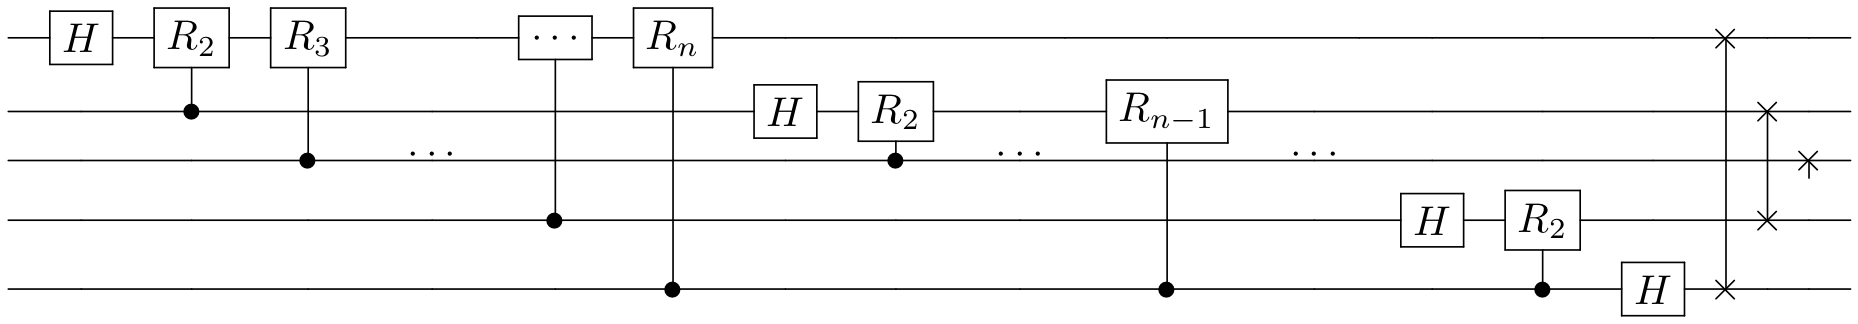

## Braket Implementation 

In [1]:
# General imports
import boto3
import numpy as np
import math
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline
import string
import time
from datetime import datetime
# import logging
import logging

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.aws import AwsDevice, AwsQuantumTask
from braket.devices import LocalSimulator

In [5]:
# S3 storage
my_bucket = f"amazon-braket-xxx" #"amazon-braket-xxx" # the name of the bucket
my_prefix = "qft-qpe-output" # the name of the folder in the bucket
s3_folder = (my_bucket, my_prefix)

# set up the device to be the managed simulator
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")
# device = LocalSimulator()

In [6]:
## QFT function
def qft(qubits):    
    """
    Construct a circuit object corresponding to the Quantum Fourier Transform (QFT)
    algorithm, applied to the argument qubits.  Does not use recursion to generate the QFT.
    
    Args:
        qubits (int): The list of qubits on which to apply the QFT
    """
    qftcirc = Circuit()
    
    # get number of qubits
    num_qubits = len(qubits)
    
    for k in range(num_qubits):
        # First add a Hadamard gate
        qftcirc.h(qubits[k])
    
        # Then apply the controlled rotations, with weights (angles) defined by the distance to the control qubit.
        # Start on the qubit after qubit k, and iterate until the end.  When num_qubits==1, this loop does not run.
        for j in range(1,num_qubits - k):
            angle = 2*math.pi/(2**(j+1))
            qftcirc.cphaseshift(qubits[k+j],qubits[k], angle)
            
    # Then add SWAP gates to reverse the order of the qubits:
    for i in range(math.floor(num_qubits/2)):
        qftcirc.swap(qubits[i], qubits[-i-1])
        
    return qftcirc

## Inverse QFT function
def inverse_qft(qubits):
    """
    Construct a circuit object corresponding to the inverse Quantum Fourier Transform (QFT)
    algorithm, applied to the argument qubits.  Does not use recursion to generate the circuit.
    
    Args:
        qubits (int): The list of qubits on which to apply the inverse QFT
    """
    # instantiate circuit object
    qftcirc = Circuit()
    
    # get number of qubits
    num_qubits = len(qubits)
    
    # First add SWAP gates to reverse the order of the qubits:
    for i in range(math.floor(num_qubits/2)):
        qftcirc.swap(qubits[i], qubits[-i-1])
        
    # Start on the last qubit and work to the first.
    for k in reversed(range(num_qubits)):
    
        # Apply the controlled rotations, with weights (angles) defined by the distance to the control qubit.
        # These angles are the negative of the angle used in the QFT.
        # Start on the last qubit and iterate until the qubit after k.  
        # When num_qubits==1, this loop does not run.
        for j in reversed(range(1, num_qubits - k)):
            angle = -2*math.pi/(2**(j+1))
            qftcirc.cphaseshift(qubits[k+j],qubits[k], angle)
            
        # Then add a Hadamard gate
        qftcirc.h(qubits[k])
    
    return qftcirc

## Examples of QFT circuits  

In [7]:
# show inverse QFT example circuit
num_qubits = 2
qubits=range(num_qubits)
my_qft_circ = qft(qubits)
print('QFT CIRCUIT:')
print(my_qft_circ)

# show inverse QFT example circuit
print('')
print('INVERSE-QFT CIRCUIT:')
my_iqft_circ = inverse_qft(qubits)
print(my_iqft_circ)

QFT CIRCUIT:
T  : |0|     1     |2| 3  |
                           
q0 : -H-PHASE(1.57)---SWAP-
        |             |    
q1 : ---C-----------H-SWAP-

T  : |0|     1     |2| 3  |

INVERSE-QFT CIRCUIT:
T  : | 0  |1|     2      |3|
                            
q0 : -SWAP---PHASE(-1.57)-H-
      |      |              
q1 : -SWAP-H-C--------------

T  : | 0  |1|     2      |3|


## Quantum Phase Estimation  

**Background**

__Quantum Phase Estimation Algorithm__: 
The QPE algorithm takes a unitary $U$ as input. For the sake of simplicity (we will generalize the discussion below), suppose that the algorithm also takes as input an eigenstate $|\psi \rangle$ fulfilling 

$$U|\psi \rangle = \lambda |\psi \rangle,$$

with $\lambda = \exp(2\pi i\varphi)$. 

QPE uses two registers of qubits: we will refer to the first register as *precision* qubits (as the number of qubits $n$ in the first register sets the achievable precision of our results) and the second register as *query* qubits (as the second register hosts the eigenstate $|\psi \rangle$). 
Suppose we have prepared this second register in $|\psi \rangle$.  We then prepare a uniform superposition of all basis vectors in the first register using a series of Hadamard gates. 

Next, we apply a series of controlled-unitaries $C-U^{2^{k}}$ for different powers of $k=0,1,\dots, n-1$ (as illustrated in the circuit diagram below). 
For example, for $k=1$ we get
\begin{equation} 
\begin{split}
(|0 \rangle + |1 \rangle) |\psi \rangle  & \rightarrow |0 \rangle |\psi \rangle + |1 \rangle U|\psi \rangle \\
& = (|0 \rangle + e^{2\pi i \varphi}|1 \rangle) |\psi \rangle.
\end{split}
\end{equation}

Note that the second register remains unaffected as it stays in the eigenstate $|\psi \rangle$. 
However, we managed to transfer information about the phase of the eigenvalue of $U$ (i.e., $\varphi$) into the first *precision* register by encoding it as a relative phase in the state of the qubits in the first register. 

Similarly, for $k=2$ we obtain
\begin{equation} 
\begin{split}
(|0 \rangle + |1 \rangle) |\psi \rangle  & \rightarrow |0 \rangle |\psi \rangle + |1 \rangle U^{2}|\psi \rangle \\
& = (|0 \rangle + e^{2\pi i 2\varphi}|1 \rangle) |\psi \rangle,
\end{split}
\end{equation}

where this time we wrote $2\varphi$ into the precision register. The process is similar for all $k>2$.

Introducing the following notation for binary fractions
$$[0. \varphi_{l}\varphi_{l+1}\dots \varphi_{m}] = \frac{\varphi_{l}}{2^{1}} + \frac{\varphi_{l+1}}{2^{2}} + \frac{\varphi_{m}}{2^{m-l+1}},$$ 

one can easily show that the application of a controlled unitary $C-U^{2^{k}}$ leads to the following transformation

\begin{equation} 
\begin{split}
(|0 \rangle + |1 \rangle) |\psi \rangle  & \rightarrow |0 \rangle |\psi \rangle + |1 \rangle U^{2^{k}}|\psi \rangle \\
& = (|0 \rangle + e^{2\pi i 2^{k}\varphi}|1 \rangle) |\psi \rangle \\
& = (|0 \rangle + e^{2\pi i [0.\varphi_{k+1}\dots \varphi_{n}]}|1 \rangle) |\psi \rangle,
\end{split}
\end{equation}

where the first $k$ bits of precision in the binary expansion (i.e., those bits to the left of the decimal) can be dropped, since $e^{2\pi i \theta} = 1$ for any whole number $\theta$.

The QPE algorithm implements a series of these transformations for $k=0, 1, \dots, n-1$, using $n$ qubits in the precision register. 
In its entirety, this sequence of controlled unitaries leads to the transformation

$$ |0, \dots, 0 \rangle \otimes |\psi \rangle \longrightarrow 
(|0 \rangle + e^{2\pi i [0.\varphi_{n}]}|1 \rangle) 
\otimes (|0 \rangle + e^{2\pi i [0.\varphi_{n-1}\varphi_{n}]}|1 \rangle)
\otimes \dots
\otimes (|0 \rangle + e^{2\pi i [0.\varphi_{1}\dots\varphi_{n}]}|1 \rangle) 
\otimes |\psi \rangle.
$$

By inspection, one can see that the state of the register qubits above corresponds to a quantum Fourier transform of the state $|\varphi_1,\dots,\varphi_n\rangle$. Thus, the final step of the QPE algorithm is to run the *inverse* Quantum Fourier Transform (QFT) algorithm on the precision register to extract the phase information from this state. The resulting state is
$$|\varphi_{1}, \varphi_{2}, \dots, \varphi_{n}  \rangle \otimes |\psi\rangle.$$

Measuring the precision qubits in the computational basis then gives the classical bitstring $\varphi_{1}, \varphi_{2}, \dots, \varphi_{n}$, from which we can readily infer the phase estimate $\tilde{\varphi} = 0.\varphi_{1} \dots \varphi_{n}$ with the corresponding eigenvalue $\tilde{\lambda} = \exp(2\pi i \tilde{\varphi})$.
 
__Simple example for illustration__: For concreteness, let us consider a simple example with the unitary given by the Pauli $X$ gate, $U=X$, for which $|\Psi \rangle = |+\rangle = (|0 \rangle + |1 \rangle)/\sqrt{2}$ is an eigenstate with eigenvalue $\lambda = 1$, i.e., $\varphi=0$. 
This state can be prepared simply with a Hadamard gate as $|\Psi \rangle = H|0 \rangle$. 
We take a precision register consisting of just two qubits ($n=2$). 

Thus, after the first layer of Hadamard gates, the quantum state is
$$|0,0,0 \rangle \rightarrow |+,+,+\rangle.$$

Next, the applications of the controlled-$U$ gates (equal to $C-X$ operations, or CNOT gates in this example) leave this state untouched, since $|+\rangle$ is an eigenstate of $X$ with eigenvalue $+1$. 
Finally, applying the inverse QFT leads to 

$$\mathrm{QFT}^{\dagger}|+++\rangle=\mathrm{QFT}^\dagger\frac{|00\rangle + |01\rangle + |10\rangle + |11\rangle}{4}\otimes |+\rangle = |00\rangle \otimes |+\rangle,$$

from which we deduce $\varphi = [0.00]=0$ and therefore $\lambda=1$, as expected. 
Here, in the last step we have used $|00\rangle + |01\rangle + |10\rangle + |11\rangle = (|0\rangle + e^{2\pi i[0.0]}|1\rangle)(|0\rangle + e^{2\pi i[0.00]}|1\rangle)$, which makes the effect of the inverse QFT more apparent.  

__Initial state of query register__: So far, we have assumed that the query register is prepared in an eigenstate $|\Psi\rangle$ of $U$. What happens if this is not the case? Let's reconsider the simple example above.

Suppose now that the query register is instead prepared in the state $|\Psi\rangle = |1\rangle$. 
We can always express this state in the eigenbasis of $U$, i.e., $|1\rangle = \frac{1}{\sqrt{2}}(|+\rangle - |-\rangle)$. 
By linearity, application of the QPE algorithm then gives (up to normalization)

\begin{equation} 
\begin{split}
\mathrm{QPE}(|0,0,\dots\rangle \otimes |1\rangle) & = \mathrm{QPE}(|0,0,\dots\rangle \otimes |+\rangle)
- \mathrm{QPE}(|0,0,\dots\rangle \otimes |-\rangle) \\
& =  |\varphi_{+}\rangle \otimes |+\rangle - |\varphi_{-}\rangle \otimes |-\rangle. \\
\end{split}
\end{equation}

When we measure the precision qubits in this state, 50% of the time we will observe the eigenphase $\varphi_{+}$ and 50% of the time we will measure $\varphi_{-}$. We illustrate this example numerically below.

This example motivates the general case: we can pass a state that is not an eigenstate of $U$ to the QPE algorithm, but we may need to repeat our measurements several times in order to obtain an estimate of the desired phase.

## QPE Circuit  

The QPE circuit can be implemented using Hadamard gates, controlled-$U$ unitaries, and the inverse QFT (denoted as $\mathrm{QFT}^{-1}$). 
Following the discussion above, the circuit that implements the QPE algorithm reads as below, where m is the size of lower query register and n is the size of upper precision register.

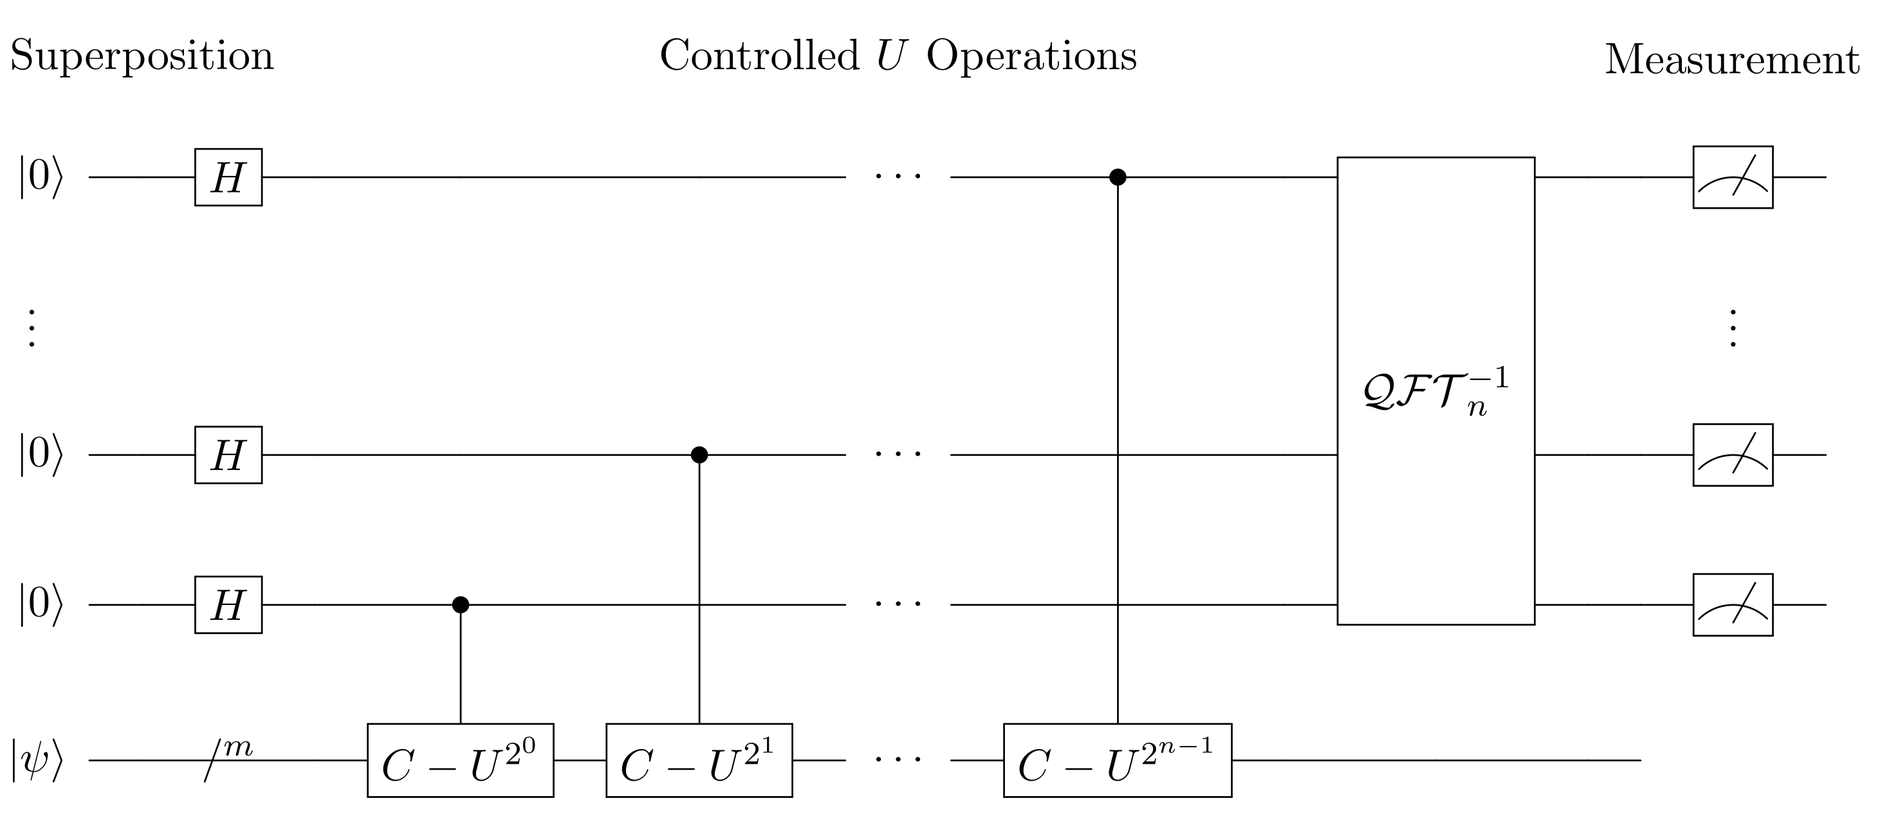

## QPE Example 

Let us determine the eigenstates of Pauli $X = \begin{pmatrix} 
0 & 1\\
1 & 0\\
\end{pmatrix}$ operator using QPE with the two-qubit query register. 

In [8]:
# Controlled Unitary circuit
def cU(cInd, tInd):
    return Circuit().cnot(cInd,tInd)


def str2circ(s, indQ0):
    circ = Circuit()
    for ind in range(len(s)):
        if s[ind]=='1':
            circ.x(ind+indQ0)
    return circ


T  : |0|1|2|3| 4  |5|     6      |7|
                                    
q0 : -H---C-C-SWAP---PHASE(-1.57)-H-
          | | |      |              
q1 : -H-C-|-|-SWAP-H-C--------------
        | | |                       
q2 : -H-X-X-X-H---------------------

T  : |0|1|2|3| 4  |5|     6      |7|
Counter({'000': 1000})


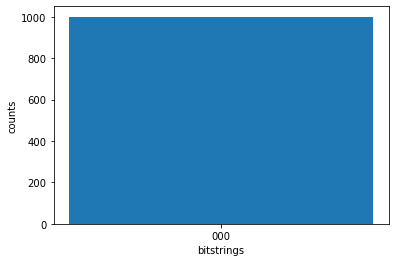

In [10]:
# QPE circuit for |+> eigenstate of X
circ_QPE = Circuit().h(0).h(1).h(2)
circ_QPE = circ_QPE.add_circuit(cU(1,2))
circ_QPE = circ_QPE.add_circuit(cU(0,2))
circ_QPE = circ_QPE.add_circuit(cU(0,2))
circ_QPE = circ_QPE.add_circuit(inverse_qft([0,1]))
circ_QPE = circ_QPE.add_circuit(Circuit().h(2))

print (circ_QPE)

task = device.run(circ_QPE, s3_folder, shots=1000)
result = task.result()

## Get measurement counts
counts = result.measurement_counts

# print counts
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');
